### Importing Libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 1) Loading the data and inspecting the data 

In [2]:
dfl = pd.read_csv("Leads.csv")
dfl.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
dfl.shape

(9240, 37)

In [4]:
dfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
dfl.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#Lets check for duplicates now
sum(dfl.duplicated(subset = 'Prospect ID')) == 0

True

In [7]:
sum(dfl.duplicated(subset = 'Lead Number')) == 0

True

From the above we can incur that there is no duplicate values in the subsets.
Now we can move ahead with cleaning the data

# 2) Cleaning the data / Data Preparation


In [8]:
# Converting all the values to lower case
dfl = dfl.applymap(lambda s:s.lower() if type(s) == str else s)

In [9]:
dfl.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
# Replacing 'Select' with NaN (Since it means no option is selected)
dfl = dfl.replace('select',np.nan)

In [11]:
#looking for unique values
dfl.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [12]:
#from the above, we can see prospect ID and Lead number both have unique and same values.
#Thus we can drop the columns
dfl.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [13]:
dfl.nunique()

Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [14]:
#lets also drop the columns that unique/singular values
dfl1= dfl.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)
dfl1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,...,interested in other courses,low in relevance,NaN,NaN,02.medium,02.medium,15.0,15.0,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,ringing,NaN,NaN,NaN,02.medium,02.medium,15.0,15.0,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,will revert after reading the email,might be,potential lead,mumbai,02.medium,01.high,14.0,20.0,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,ringing,not sure,NaN,mumbai,02.medium,01.high,13.0,17.0,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,will revert after reading the email,might be,NaN,mumbai,02.medium,01.high,15.0,18.0,no,modified


In [15]:
#Checking the percent missing values
round(100*(dfl.isnull().sum()/len(dfl1.index)), 2) 

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [16]:
#Now let us remove all the columns that have more than 40% missing values
col=dfl1.columns

for i in col:
    if((100*(dfl[i].isnull().sum()/len(dfl.index))) >= 45):
        dfl1.drop(i, 1, inplace = True)

In [17]:
dfl1.nunique()

Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

In [18]:
dfl1.shape

(9240, 23)

In [19]:
dfl1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In the many columns, the null values is huge. Removing all the null columns isnt the most feasible course of action, thus we can just replace the NaN values with not provided (answers from customers)


In [20]:
dfl1['Specialization'] = dfl1['Specialization'].fillna('not provided') 
dfl1['What matters most to you in choosing a course'] = dfl1['What matters most to you in choosing a course'].fillna('not provided')
dfl1['Country'] = dfl1['Country'].fillna('not provided')
dfl1['What is your current occupation'] = dfl1['What is your current occupation'].fillna('not provided')
dfl1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [21]:
#checking the percentage of missing values again 
round(100*(dfl1.isnull().sum()/len(dfl1.index)),2 )

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

One thing we can do, is categorize the countries, as it will be easier for us to understand which country and/or variable to look at

In [22]:
def slots(y):
    category = ""
    if y == "india":
        category = "india"
    elif y == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

dfl1['Country'] = dfl1.apply(lambda x:slots(x['Country']), axis = 1)
dfl1['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [23]:
round(100*(dfl1.isnull().sum()/len(dfl1.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [24]:
dfl1 = dfl1.drop(['Tags','City'],axis=1)
dfl1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not provided,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [25]:
round(100*(dfl1.isnull().sum()/len(dfl1.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [26]:
# Checking the percent of lose if the null values are removed
round(100*(sum(dfl1.isnull().sum(axis=1) > 1)/dfl1.shape[0]),2)

1.48

In [27]:
dfl2 = dfl1[dfl1.isnull().sum(axis=1) <1]

In [28]:
# Rechecking the percentage of missing values
round(100*(dfl2.isnull().sum()/len(dfl2.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [29]:
#lets summarize all the caategorical vlaues
for column in dfl2:
    print(dfl2[column].astype('category').value_counts())
    print('____________________________________________')

landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64
____________________________________________
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      129
referral sites        125
facebook               31
bing                    6
click2call              4
live chat               2
press_release           2
social media            2
welearn                 1
welearnblog_home        1
pay per click ads       1
testone                 1
blog                    1
nc_edm                  1
youtubechannel          1
Name: Lead Source, dtype: int64
____________________________________________
no     8358
yes     716
Name: Do Not Email, dtype: int64
____________________________________________
no     9072
yes       2
Name: Do Not Call, dtype: int64
________________________________________

In [30]:
dfl2.shape

(9074, 21)

# 3) Exploratory Data Analysis

**UNIVARIATE CATEGORICAL ANALYSIS**


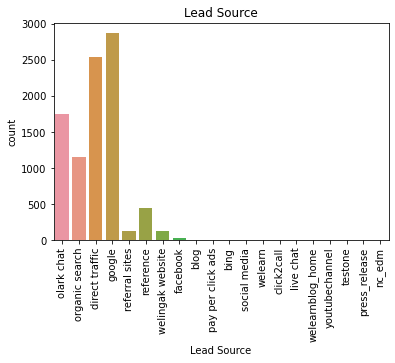

In [31]:
sns.countplot(dfl2['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()



From the above, we can see that google, dirrect traffic and olark chat has the highest lead source creation, while facebook has the least

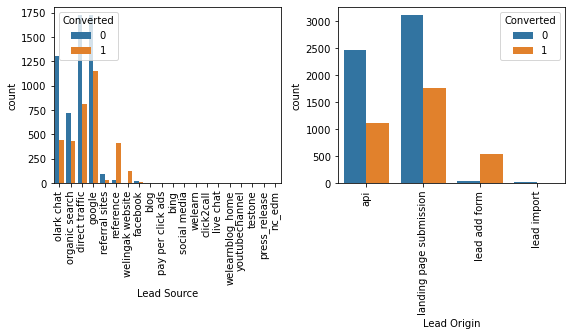

In [32]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['Lead Source', 'Lead Origin']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(dfl2[feature], hue=dfl2["Converted"])
    plt.xticks(rotation=90)
    plt.tight_layout()

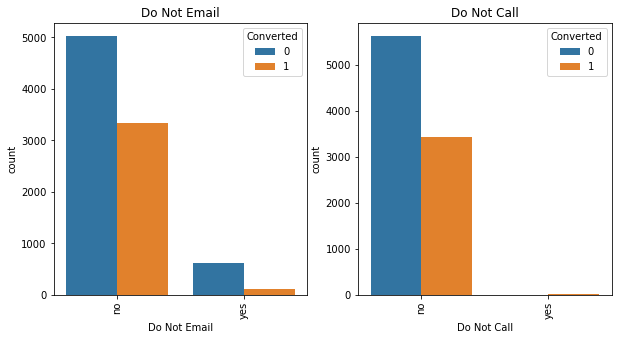

In [33]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= dfl2).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= dfl2).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

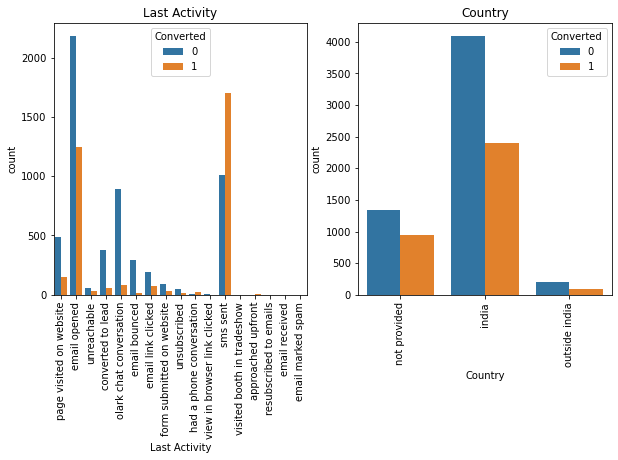

In [34]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= dfl2).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= dfl2).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

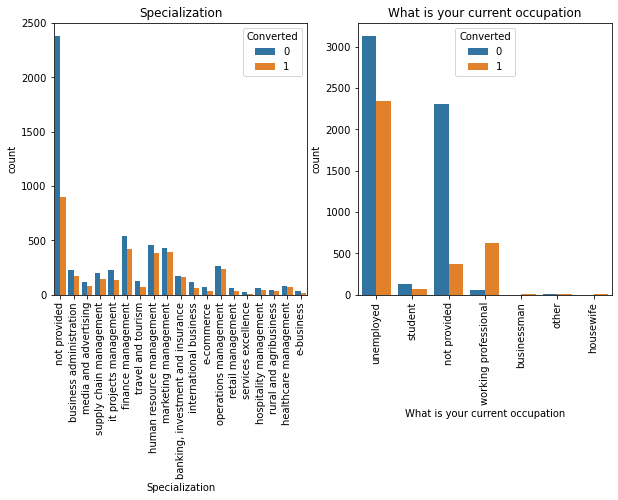

In [35]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= dfl2).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= dfl2).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()


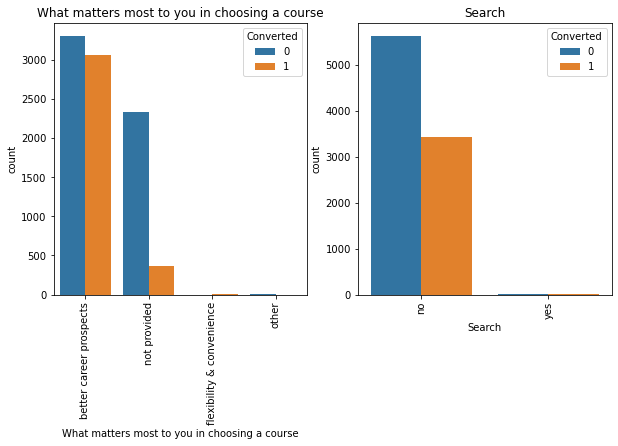

In [36]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= dfl2).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= dfl2).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

**From the above here are the following things we can Observe**
1) The count of leads from the Lead Add Form is extremely low but the conversion rate is very high

2) API and Landing page submission form has a very high count of leads but the conversion is comparitively low

3) Sms sent have compartively lower leads but very high conversions. Email sents have the highest leads

4) The conversion rates for working professional is very high compared to the leads

5) To increase overall conversion rate, we need to increase the number of Working Professional leads by reaching out to them through different social sites such as LinkedIn etc. and also on increasing the conversion rate of Unemployed leads

6) We also observed that there are multiple columns which contains data of a single value only. As these columns do not contribute towards any inference, we can remove them from further analysis


*Working on the above lead conversions for landing page should be the priority*

**As for the leads, the coversion rate of olark chart, google and direct traffic should also be focused on**

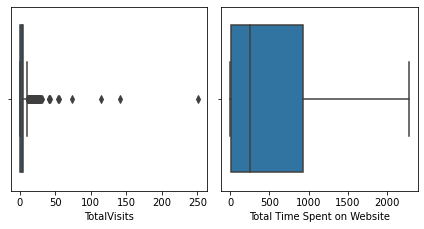

In [37]:
#Now lets look at the outliers
fig=plt.subplots(figsize=(6, 6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(dfl2[feature])
    plt.tight_layout()

One can easily see that total visits column has a lot of outliers.

We can remove the outliers by capping them to 96 percent quantile


In [38]:
d1 = dfl2["TotalVisits"].quantile(0.96)
dfl2["TotalVisits"][dfl2["TotalVisits"] >= d1] = d1

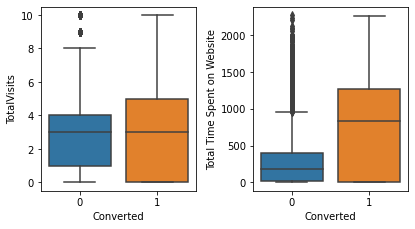

In [39]:
fig=plt.subplots(figsize=(6, 6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(y = feature, x = 'Converted', data = dfl2)
    plt.tight_layout()

**From the above, we can easily say that spending more time on the website leads to more conversions**

**Correlations**

In [40]:
#lets plot the heatmaps to see the correlation b/w the variables

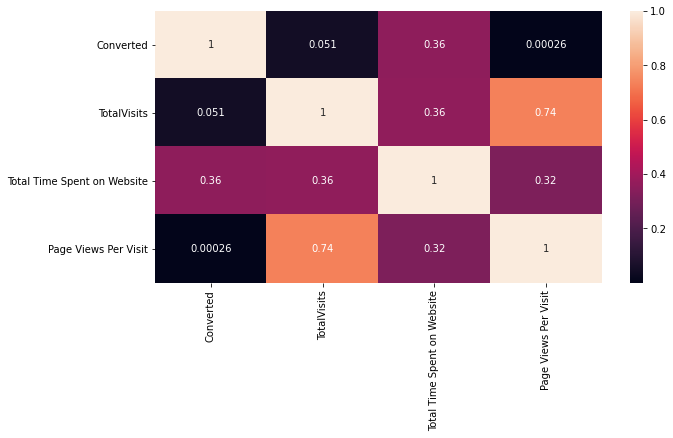

In [41]:
plt.figure(figsize=(10,5))
sns.heatmap(dfl2.corr(),annot= True)
plt.show()

In [42]:
dfl2.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(12)

Converted                    Converted                      1.000000
TotalVisits                  Page Views Per Visit           0.737996
                             Total Time Spent on Website    0.361207
Converted                    Total Time Spent on Website    0.359261
Total Time Spent on Website  Page Views Per Visit           0.318350
Converted                    TotalVisits                    0.050742
                             Page Views Per Visit           0.000260
dtype: float64

In [43]:
#From the above, we can see the correlation between the conversions and total pages visit, which is high

In [44]:
numeric = dfl2[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.191867,482.887481,2.370151
std,2.780618,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,10.000000,1839.000000,9.000000
max,10.000000,2272.000000,55.000000


From the above, we can see there we can see the outliers have been addressed

# 4) Creating Dummy Variables

In [45]:
#lets get a list of categorical variables
dfl2.loc[:, dfl2.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [46]:
#making dummy values and dropping first column
dummy = pd.get_dummies(dfl2[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)


In [47]:
#concatting the dummy values to the mainframe :
df_dummy=pd.concat([dfl2, dummy], axis=1)
df_dummy

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,outside india,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


In [48]:
df_dummy = df_dummy.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_dummy

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


**Now that dummies are created, we can create a test-train split for the regression model**

# 5) Test - Train Split


In [49]:
from sklearn.model_selection import train_test_split
X=df_dummy.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [50]:
#Giving the target variable to y
y=df_dummy['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

**Now Lets split the given data set into 75% and 25% for train and test respectively**

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=100)

In [52]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6805 entries, 5885 to 5754
Data columns (total 80 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6805 non-null   float64
 1   Total Time Spent on Website                           6805 non-null   int64  
 2   Page Views Per Visit                                  6805 non-null   float64
 3   Lead Origin_landing page submission                   6805 non-null   uint8  
 4   Lead Origin_lead add form                             6805 non-null   uint8  
 5   Lead Origin_lead import                               6805 non-null   uint8  
 6   Specialization_business administration                6805 non-null   uint8  
 7   Specialization_e-business                             6805 non-null   uint8  
 8   Specialization_e-commerce                             6

**Feature Scaling**

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
5885,-1.149988,-0.887663,-1.130068,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8505,1.361344,2.265199,0.536079,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
894,1.720106,-0.821711,-0.177984,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6437,-1.149988,-0.887663,-1.130068,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2988,1.002582,1.369354,0.298058,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [54]:
#Lets check what the conversion rate is
print("Conversion rate is ", (sum(df_dummy['Converted'])/len(df_dummy['Converted'].index))*100)

Conversion rate is  37.85541106458012


In [55]:
#Lets check the correlation between the numerical variables b/w converted and non converted
conv_corr = df_dummy.corr()
conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Last Activity_resubscribed to emails    Last Notable Activity_resubscribed to emails      1.000000
Last Activity_email marked spam         Last Notable Activity_email marked spam           1.000000
Lead Origin_lead import                 Lead Source_facebook                              0.983684
Last Activity_unsubscribed              Last Notable Activity_unsubscribed                0.872656
Lead Origin_lead add form               Lead Source_reference                             0.866191
Last Activity_email opened              Last Notable Activity_email opened                0.861636
Last Activity_sms sent                  Last Notable Activity_sms sent                    0.853102
Last Activity_email link clicked        Last Notable Activity_email link clicked          0.800686
Last Activity_had a phone conversation  Last Notable Activity_had a phone conversation    0.747877
TotalVisits                             Page Views Per Visit                              0.737996
dtype: flo

# 6) Model Building 

*Lets now use RFE and Statsmodel to create the model*

In [56]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [57]:
from sklearn.feature_selection import RFE
#taking 15 variables as an output
rfe = RFE(logreg, n_features_to_select=15)    
rfe = rfe.fit(X_train, y_train)

In [58]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 46),
 ('Total Time Spent on Website', False, 7),
 ('Page Views Per Visit', False, 48),
 ('Lead Origin_landing page submission', False, 24),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 45),
 ('Specialization_business administration', False, 33),
 ('Specialization_e-business', False, 25),
 ('Specialization_e-commerce', False, 21),
 ('Specialization_finance management', False, 30),
 ('Specialization_healthcare management', False, 26),
 ('Specialization_hospitality management', False, 59),
 ('Specialization_human resource management', False, 31),
 ('Specialization_international business', False, 39),
 ('Specialization_it projects management', False, 27),
 ('Specialization_marketing management', False, 22),
 ('Specialization_media and advertising', False, 57),
 ('Specialization_operations management', False, 32),
 ('Specialization_retail management', False, 43),
 ('Specialization_rural and agribusiness', False, 28),
 ('Specialization_

In [59]:
#giving col the RFE selected columns
col = X_train.columns[rfe.support_]

In [60]:
X_train = X_train[col]

In [61]:
#Now lets build the model.
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6789
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3337.7
Date:                Tue, 15 Nov 2022   Deviance:                       6675.4
Time:                        15:50:41   Pearson chi2:                 6.90e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5812      0.058      9.981      0.000       0.467       0.695
Lead Origin_lead add form                                2.6823      0.206     13.025      0.000       2.279       3.086
Lead Source_welingak website                             2.0995      0.751      2.797      0.005       0.628       3.570
Do Not Email_yes                                        -1.5959      0.175     -9.138      0.000      -1.938      -1.254
Last Activity_email bounced                             -1.3711      0.410     -3.345      0.001      -2.174      -0.568
Last Activity_had a phone conversation                   1.9234      0.723      2.660      0.008       0.506       3.340
Last Activity_olark chat conversation                   -1.2578      0.169     -7.439      0.000      -1.589      -0.926
What is your current occupation_housewife               22.7513   1.66e+04      0.001      0.999   -3.25e+04    3.25e+04
What is your current occupation_other                    1.9519      0.665      2.937      0.003       0.649       3.254
What is your current occupation_student                  0.3645      0.191      1.912      0.056      -0.009       0.738
What is your current occupation_working professional     2.7740      0.168     16.473      0.000       2.444       3.104
Last Notable Activity_email link clicked                -1.9396      0.230     -8.416      0.000      -2.391      -1.488
Last Notable Activity_email opened                      -1.4458      0.077    -18.895      0.000      -1.596      -1.296
Last Notable Activity_modified                          -1.8828      0.084    -22.397      0.000      -2.048      -1.718
Last Notable Activity_olark chat conversation           -1.3218      0.325     -4.064      0.000      -1.959      -0.684
Last Notable Activity_page visited on website           -1.6547      0.169     -9.787      0.000      -1.986      -1.323
========================================================================================================================
"""

In [62]:
#p value of What is your current occupation_housewife is high, so we can drop it
col = col.drop('What is your current occupation_housewife',1)

In [63]:
#Creating the second model 
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6790
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3343.2
Date:                Tue, 15 Nov 2022   Deviance:                       6686.4
Time:                        15:50:41   Pearson chi2:                 6.92e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5811      0.058      9.979      0.000       0.467       0.695
Lead Origin_lead add form                                2.7018      0.206     13.134      0.000       2.299       3.105
Lead Source_welingak website                             2.0778      0.751      2.769      0.006       0.607       3.549
Do Not Email_yes                                        -1.5965      0.175     -9.139      0.000      -1.939      -1.254
Last Activity_email bounced                             -1.3702      0.410     -3.343      0.001      -2.173      -0.567
Last Activity_had a phone conversation                   1.9229      0.723      2.660      0.008       0.506       3.340
Last Activity_olark chat conversation                   -1.2580      0.169     -7.440      0.000      -1.589      -0.927
What is your current occupation_other                    1.9488      0.665      2.931      0.003       0.646       3.252
What is your current occupation_student                  0.3602      0.191      1.889      0.059      -0.014       0.734
What is your current occupation_working professional     2.7704      0.168     16.450      0.000       2.440       3.101
Last Notable Activity_email link clicked                -1.9302      0.229     -8.419      0.000      -2.380      -1.481
Last Notable Activity_email opened                      -1.4386      0.076    -18.820      0.000      -1.588      -1.289
Last Notable Activity_modified                          -1.8824      0.084    -22.393      0.000      -2.047      -1.718
Last Notable Activity_olark chat conversation           -1.3216      0.325     -4.062      0.000      -1.959      -0.684
Last Notable Activity_page visited on website           -1.6547      0.169     -9.785      0.000      -1.986      -1.323
========================================================================================================================
"""

In [64]:
#lets import variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
#Lets make the VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Last Activity_email bounced,1.73
1,Lead Source_welingak website,1.33
12,Last Notable Activity_olark chat conversation,1.31
7,What is your current occupation_student,1.03
13,Last Notable Activity_page visited on website,1.02
4,Last Activity_had a phone conversation,1.00
6,What is your current occupation_other,1.00
9,Last Notable Activity_email link clicked,1.00
0,Lead Origin_lead add form,0.65
5,Last Activity_olark chat conversation,0.48


In [66]:
#In this model, the VIF values seem good, but the P values do not, lets work on that
X_train.drop('What is your current occupation_student', axis = 1, inplace = True)

In [67]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6790
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3339.5
Date:                Tue, 15 Nov 2022   Deviance:                       6679.0
Time:                        15:50:41   Pearson chi2:                 6.90e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5871      0.058     10.096      0.000       0.473       0.701
Lead Origin_lead add form                                2.6868      0.206     13.055      0.000       2.283       3.090
Lead Source_welingak website                             2.0868      0.750      2.781      0.005       0.616       3.558
Do Not Email_yes                                        -1.5980      0.175     -9.152      0.000      -1.940      -1.256
Last Activity_email bounced                             -1.3575      0.410     -3.313      0.001      -2.161      -0.554
Last Activity_had a phone conversation                   1.9170      0.723      2.652      0.008       0.500       3.334
Last Activity_olark chat conversation                   -1.2514      0.169     -7.403      0.000      -1.583      -0.920
What is your current occupation_housewife               22.7386   1.66e+04      0.001      0.999   -3.25e+04    3.25e+04
What is your current occupation_other                    1.9422      0.665      2.922      0.003       0.640       3.245
What is your current occupation_working professional     2.7643      0.168     16.426      0.000       2.434       3.094
Last Notable Activity_email link clicked                -1.9355      0.230     -8.397      0.000      -2.387      -1.484
Last Notable Activity_email opened                      -1.4393      0.076    -18.842      0.000      -1.589      -1.290
Last Notable Activity_modified                          -1.8818      0.084    -22.390      0.000      -2.047      -1.717
Last Notable Activity_olark chat conversation           -1.3077      0.325     -4.022      0.000      -1.945      -0.670
Last Notable Activity_page visited on website           -1.6506      0.169     -9.770      0.000      -1.982      -1.320
========================================================================================================================
"""

In [68]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Last Activity_email bounced,1.73
1,Lead Source_welingak website,1.33
12,Last Notable Activity_olark chat conversation,1.31
13,Last Notable Activity_page visited on website,1.02
6,What is your current occupation_housewife,1.01
4,Last Activity_had a phone conversation,1.00
7,What is your current occupation_other,1.00
9,Last Notable Activity_email link clicked,1.00
0,Lead Origin_lead add form,0.65
5,Last Activity_olark chat conversation,0.48


In [69]:
#From the above model we can see the high P value and remove 'What is your current occuation_housekeeper'

In [70]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [71]:
#refitting
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6791
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3344.9
Date:                Tue, 15 Nov 2022   Deviance:                       6689.8
Time:                        15:50:41   Pearson chi2:                 6.91e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5870      0.058     10.094      0.000       0.473       0.701
Lead Origin_lead add form                                2.7060      0.206     13.162      0.000       2.303       3.109
Lead Source_welingak website                             2.0656      0.750      2.752      0.006       0.595       3.536
Do Not Email_yes                                        -1.5985      0.175     -9.153      0.000      -1.941      -1.256
Last Activity_email bounced                             -1.3567      0.410     -3.311      0.001      -2.160      -0.554
Last Activity_had a phone conversation                   1.9166      0.723      2.651      0.008       0.500       3.334
Last Activity_olark chat conversation                   -1.2516      0.169     -7.405      0.000      -1.583      -0.920
What is your current occupation_other                    1.9393      0.665      2.917      0.004       0.636       3.242
What is your current occupation_working professional     2.7609      0.168     16.404      0.000       2.431       3.091
Last Notable Activity_email link clicked                -1.9263      0.229     -8.400      0.000      -2.376      -1.477
Last Notable Activity_email opened                      -1.4323      0.076    -18.767      0.000      -1.582      -1.283
Last Notable Activity_modified                          -1.8814      0.084    -22.386      0.000      -2.046      -1.717
Last Notable Activity_olark chat conversation           -1.3077      0.325     -4.021      0.000      -1.945      -0.670
Last Notable Activity_page visited on website           -1.6507      0.169     -9.769      0.000      -1.982      -1.320
========================================================================================================================
"""

In [72]:
#Making a VIF dataframe 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Last Activity_email bounced,1.73
1,Lead Source_welingak website,1.33
11,Last Notable Activity_olark chat conversation,1.31
12,Last Notable Activity_page visited on website,1.02
4,Last Activity_had a phone conversation,1.00
6,What is your current occupation_other,1.00
8,Last Notable Activity_email link clicked,1.00
0,Lead Origin_lead add form,0.65
5,Last Activity_olark chat conversation,0.48
10,Last Notable Activity_modified,0.09


**From above we can see that the P value and VIF values are good, thus we can move ahead**

Lets make production for the model

In [73]:
#Making prediction on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5885    0.072693
8505    0.966033
894     0.300410
6437    0.300410
2988    0.642670
6175    0.642670
54      0.300410
5561    0.966033
124     0.300410
5750    0.300410
dtype: float64

In [74]:
#Reshaping it to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07269284, 0.96603343, 0.30040987, 0.30040987, 0.64266956,
       0.64266956, 0.30040987, 0.96603343, 0.30040987, 0.30040987])

In [75]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.072693,5885
1,1,0.966033,8505
2,0,0.300410,894
3,0,0.300410,6437
4,1,0.642670,2988


In [76]:
#Lets substitute 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.072693,5885,0
1,1,0.966033,8505,1
2,0,0.300410,894,0
3,0,0.300410,6437,0
4,1,0.642670,2988,1


# 7) Evaluating the Model

In [77]:
from sklearn import metrics

In [78]:
#creating a confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3690,  508],
       [1017, 1590]], dtype=int64)

**Checking the accuracy of the mode**

In [79]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)


0.7759000734753857

In [80]:
#The train model accuracy is 77% which is a good value


In [81]:
# Now using the confusion matrix
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [82]:
#Checking the sensitivity of the model
TP / float(TP+FN)

0.6098964326812428

In [83]:
#Checking the specificity
TN/ float(TN+FP)

0.8789899952358265

In [84]:
#Calculating the False Positive Rate
print(FP/ float(TN+FP))

0.12101000476417341


In [85]:
#Calculating the positive predictive value 
print (TP / float(TP+FP))

0.7578646329837941


In [86]:
#Calculating the Negative predictive value
print (TN / float(TN+ FN))

0.7839388145315488


# 8) Optimize Cut off (ROC Curve)

In [87]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [88]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

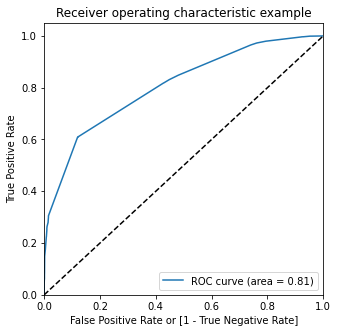

In [89]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

**The area under ROC curve is 0.81, is a good value to proceed**

In [90]:
#Creating columns with different probablity cutoff
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.072693,5885,0,1,0,0,0,0,0,0,0,0,0
1,1,0.966033,8505,1,1,1,1,1,1,1,1,1,1,1
2,0,0.300410,894,0,1,1,1,1,0,0,0,0,0,0
3,0,0.300410,6437,0,1,1,1,1,0,0,0,0,0,0
4,1,0.642670,2988,1,1,1,1,1,1,1,1,0,0,0


In [91]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.383101,1.000000,0.000000
0.1,0.1,0.506098,0.978136,0.212959
0.2,0.2,0.519618,0.972766,0.238209
0.3,0.3,0.666569,0.818182,0.572415
0.4,0.4,0.775900,0.610280,0.878752
0.5,0.5,0.775900,0.609896,0.878990
0.6,0.6,0.776194,0.607979,0.880657
0.7,0.7,0.724173,0.304565,0.984755
0.8,0.8,0.722263,0.299578,0.984755
0.9,0.9,0.683615,0.181435,0.995474


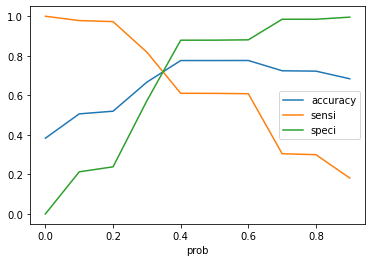

In [92]:
#Plotting the above
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [93]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.072693,5885,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.966033,8505,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.300410,894,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.300410,6437,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.642670,2988,1,1,1,1,1,1,1,1,0,0,0,1


In [94]:
# lets again check the final accuracy of the mode
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7757531227038942

In [95]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3688,  510],
       [1016, 1591]], dtype=int64)

In [96]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [97]:
# Calculating the sensitivity
TP/(TP+FN)

0.6102800153433064

In [98]:
# Calculating the specificity
TN/(TN+FP)

0.8785135778942353

With the current cutoff, we have accuracy and specificity of 77,and 87 percent respectively, 
but the sensitivity is a bit low of 61%

# 9) Prediction on Test set


In [99]:
#Scaling of numeric Values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [100]:
# Substituting all the columns in the final train model
col = X_train.columns

In [101]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,Lead Origin_lead add form,Lead Source_welingak website,Do Not Email_yes,Last Activity_email bounced,Last Activity_had a phone conversation,Last Activity_olark chat conversation,What is your current occupation_other,What is your current occupation_working professional,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website
3271,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0
1490,1.0,0,0,0,0,0,0,0,1,0,1,0,0,0
7936,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0
4216,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0
3830,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7748,1.0,0,0,1,0,0,0,0,0,0,0,0,0,1
5538,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0
1232,1.0,0,0,0,0,0,1,0,0,0,0,0,1,0
1457,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [102]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.300410
1,1,0.871636
2,0,0.300410
3,1,0.804026
4,0,0.300410


In [103]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.300410,0
1,1,0.871636,1
2,0,0.300410,0
3,1,0.804026,1
4,0,0.300410,0
...,...,...,...
2264,0,0.065237,0
2265,0,0.642670,1
2266,0,0.122137,0
2267,0,0.215110,0


In [104]:
# Lets again Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7708241516086382

In [105]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1278,  163],
       [ 357,  471]], dtype=int64)

In [106]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [107]:
#Calculating the sensitivity of the model
TP/(TP+FN)

0.5688405797101449

In [108]:
# Calculating the specificity
TN/(TN+FP)

0.8868841082581541

# 10) Precision Recall

In [109]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       0
 3       0
 4       1
        ..
 6800    0
 6801    1
 6802    0
 6803    0
 6804    0
 Name: Converted, Length: 6805, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       1
        ..
 6800    0
 6801    1
 6802    1
 6803    0
 6804    0
 Name: Predicted, Length: 6805, dtype: int64)

In [110]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

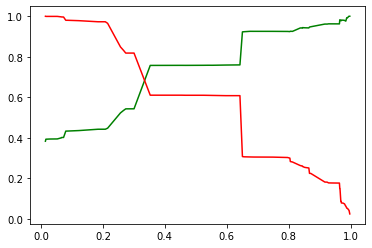

In [111]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [112]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.072693,5885,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.966033,8505,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.300410,894,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.300410,6437,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.642670,2988,1,1,1,1,1,1,1,1,0,0,0,1


In [113]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7759000734753857

In [114]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3689,  509],
       [1016, 1591]], dtype=int64)

In [115]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [116]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7576190476190476

In [117]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.6102800153433064

**Cut off being 0.41, the precision is around 74% and Recall is 61%**

# 11) Test Set Prediction

In [118]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.300410
1,1,0.871636
2,0,0.300410
3,1,0.804026
4,0,0.300410


In [119]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.300410,0
1,1,0.871636,1
2,0,0.300410,0
3,1,0.804026,1
4,0,0.300410,0
...,...,...,...
2264,0,0.065237,0
2265,0,0.642670,1
2266,0,0.122137,0
2267,0,0.215110,0


In [120]:
# Overall Accuracy of the model
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7708241516086382

In [121]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1278,  163],
       [ 357,  471]], dtype=int64)

In [122]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [123]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7429022082018928

In [124]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.5688405797101449

In [125]:
#Specificity = TN/ float(TN+FP)
TN/ (TN+FP)

0.8868841082581541

# 12) Conclusion / Observations


In [126]:
print("Features used in Final Model :", col)

print("____Feature Importance___")
print(res.params)

Features used in Final Model : Index(['Lead Origin_lead add form', 'Lead Source_welingak website',
       'Do Not Email_yes', 'Last Activity_email bounced',
       'Last Activity_had a phone conversation',
       'Last Activity_olark chat conversation',
       'What is your current occupation_other',
       'What is your current occupation_working professional',
       'Last Notable Activity_email link clicked',
       'Last Notable Activity_email opened', 'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_page visited on website'],
      dtype='object')
____Feature Importance___
const                                                   0.586970
Lead Origin_lead add form                               2.706041
Lead Source_welingak website                            2.065584
Do Not Email_yes                                       -1.598527
Last Activity_email bounced                            -1.356715
Last Activity_had a

**The most important features that affected the model most are :**
1) Total Number of site vists

2) The total time spend on the website

3) When the lead sources were SMS, direct traffic or Google**

Also, the final Observations are as follows :

_________For Train Data___________

**Accuracy : 77.6%**

**Sensitivity : 60.9%**

**Specificity : 87.7%**

_________For Test Data___________

**Accuracy : 77.08%**

**Sensitivity : 56.88%**

**Specificity : 88.68%** 
